# fruits 를 KNN으로 분류하기

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

fruits = pd.read_csv("../Data/fruits.csv")
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


## Feature 

(필기)deeplearning 에서는 pandas 조금 쓰고 numpy를 많이 씀 퍼포먼스도 그렇고 판다스는 2차원이 한계임

In [8]:
# 연습 : numpy의 column stack과 row stack

import numpy as np

testA = np.array([1,2,3,4])
testB = np.array([10,20,30,40])

In [11]:
# 2개의 array를 묶어서 컬럼기반으로 하나의 array로 만들기 zip 사용!
combineA = [[i,j] for i,j in zip(testA,testB)]

print(np.array(combineA))

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]]


In [12]:
# 다른 방법 column stack
combineB = np.column_stack((testA, testB))
print(combineB) 

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]]


In [13]:
# row stack
combineC = np.row_stack((testA,testB))
print(combineC)

[[ 1  2  3  4]
 [10 20 30 40]]


---


In [14]:
fruits = pd.read_csv("../Data/fruits.csv")

In [22]:

fruit_data = np.column_stack((fruits.length,fruits.weight))
fruit_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [24]:
fruit_target = np.array(fruits['name'])
fruit_target

array(['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'berry', 'berry', 'berry', 'berry', 'berry', 'berry', 'berry',
       'berry', 'berry', 'berry', 'berry', 'berry', 'berry', 'berry'],
      dtype=object)

In [34]:
# sklearn으로 train test 분류

from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    fruit_data,
    fruit_target,
    stratify=fruits['name'],
    random_state=42
    )

In [35]:
# knn으로 학습시키고
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_data,train_target)


KNeighborsClassifier()

In [36]:
# 정확도 출력하기
kn.score(test_data,test_target)

1.0

---
# 수상한 과일?

In [37]:
kn.predict([[25,150]])

array(['berry'], dtype=object)

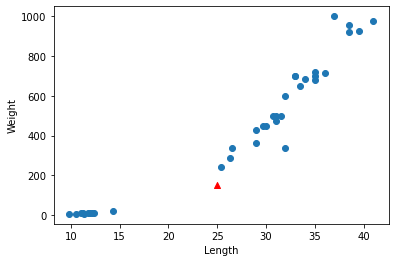

In [41]:
import matplotlib.pyplot as plt

plt.scatter(train_data[:,0], train_data[:,1])
plt.scatter(25,150,marker = '^',c='red')


plt.xlabel('Length')
plt.ylabel('Weight')

plt.show()

> apple쪽에 가까운 것 같은 데, berry라니?

In [48]:
# 이웃을 출력해보자 
distance, indexes = kn.kneighbors([[25,150]])
print(indexes)

[[11 20 13 22 15]]


In [49]:
train_data[indexes]

array([[[ 25.4, 242. ],
        [ 14.3,  19.7],
        [ 12.4,  13.4],
        [ 12.2,  12.2],
        [ 26.3, 290. ]]])

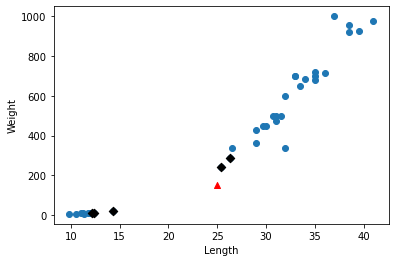

In [62]:
plt.scatter(train_data[:,0], train_data[:,1])
plt.scatter(25,150,marker = '^',c='red')
plt.scatter(train_data[indexes,0],train_data[indexes,1],marker= 'D',c='black')

plt.xlabel('Length')
plt.ylabel('Weight')

plt.show()

In [59]:
train_data[indexes][0]

array([[ 25.4, 242. ],
       [ 14.3,  19.7],
       [ 12.4,  13.4],
       [ 12.2,  12.2],
       [ 26.3, 290. ]])

In [55]:
train_target[indexes]

array([['apple', 'berry', 'berry', 'berry', 'apple']], dtype=object)

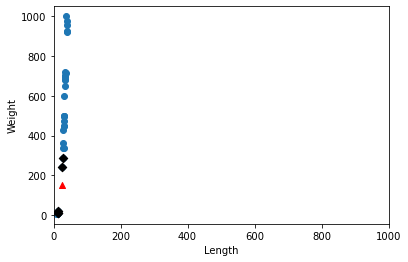

In [61]:
plt.scatter(train_data[:,0], train_data[:,1])
plt.scatter(25,150,marker = '^',c='red')
plt.scatter(train_data[indexes,0],train_data[indexes,1],marker= 'D',c='black')


plt.xlabel('Length')
plt.ylabel('Weight')
plt.xlim(0,1000)

plt.show()

> sample이 Length에는 거의 영향을 받지 않고 Weight에서 영향을 많이 받는다.  
> 차트의 모양대로 현재는 berry로 생각하는 것이 맞는 것 같다.  

In [63]:
# Length와 Weight의 평균과 표준편차를 구해서 비교해보자 
mean = np.mean(train_data, axis=0)
std = np.std(train_data, axis=0)


In [65]:
print(mean,std)

[ 26.93333333 441.98333333] [ 10.09141549 325.61300692]


> Length와 Weight의 차이가 너무 심하다

---
# train_data를 표준점수(Z점수)로 변경하자

표준점수 = (Feature - 평균)/ 표준편차

In [69]:
train_scaled = (train_data -  mean) / std
train_scaled[0:5]

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137]])

In [68]:
# sklearn을 이용한 방법
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)

train_scaled2 = scaler.transform(train_data)
train_scaled2[0:5]

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137]])

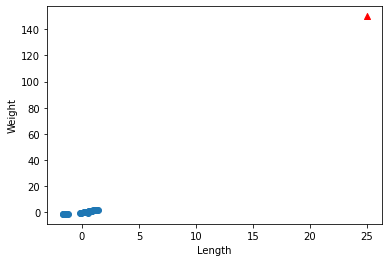

In [71]:
### 전처리 데이터로 모델 훈련하기
plt.scatter(train_scaled2[:,0],train_scaled2[:,1])
plt.scatter(25,150,marker = '^',c = 'red')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

> 예측할 데이터로 표준점수로 변경이 필요


In [74]:
new = ([25, 150]- mean) / std

new

array([-0.19158198, -0.89671889])

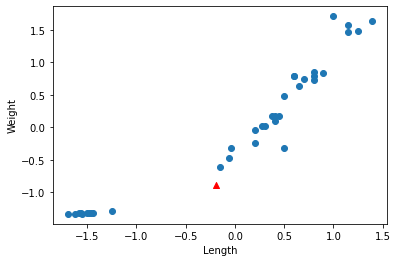

In [75]:
### 전처리 데이터로 모델 훈련하기
plt.scatter(train_scaled2[:,0],train_scaled2[:,1])
plt.scatter(new[0],new[1],marker = '^',c = 'red')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

### KKN으로 분류

In [76]:
kn.fit(train_scaled2,train_target)

KNeighborsClassifier()

In [77]:
# 검증 데이터도 표준점수로 변경 
# (*** 중요 : 평균과 표준편차는 Train Set에서 구한 값으로 사용한다.)
# (*** 중요 : 평균과 표준편차는 Train Set에서 구한 값으로 사용한다.)
# (*** 중요 : 평균과 표준편차는 Train Set에서 구한 값으로 사용한다.)
test_scaled = (test_data - mean) / std

In [78]:
kn.score(test_scaled, test_target)

1.0

In [79]:
# 수상한 과일을 다시 예측하
print(kn.predict([new]))

['apple']


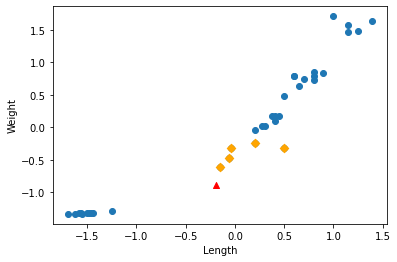

In [82]:
# 확인을 위해 이웃을 출력
distance, indexes = kn.kneighbors([new])

plt.scatter(train_scaled2[:,0],train_scaled2[:,1])
plt.scatter(new[0],new[1],marker = '^',c = 'red')
plt.scatter(train_scaled2[indexes,0],train_scaled[indexes,1],marker = 'D',c = 'orange')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()